# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

<span style="color:green"><strong>Prova realizada por Arion Melkan de Freitas</strong></span>

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar o exame, você deve fazer um "upload" do notebook no _moodle_</font>.

In [1]:
# Importando todas as bibliotecas
import numpy as np
import pandas as pd
import glob
import pytesseract as ocr
import matplotlib.pyplot as plt
import re
import imageio
import seaborn as sns

from PIL import Image  
from pdf2image import convert_from_path
from functools import reduce
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from nltk import word_tokenize
from scipy.spatial import distance_matrix
from imageio import imread
from skimage.feature import local_binary_pattern

sns.set()

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.


In [2]:
# Deixando em uma lista para se um dia eu utilizar a mesma ideia com mais pdf's
lista_pdf = ['modcovid.pdf']
extensao  = '.png' # criando uma variável para extensão da imagem

# Uso map e transformo o pdf em imagem
lista_img = list(map(lambda x: convert_from_path(x), lista_pdf))

# Utilizo map e aqui nessa parte quero pegar o nome para mais tarde utilizar no meu arquivo txt
# Eu poderia utilizar o split, seria outra solução e até mais sucinta, porém quero deixar de uma forma mais "automatizada".
nome_img  = list(map(lambda x: re.search('[A-Z a-z]+[^.]', x)[0], lista_pdf))

# Aqui ocorre o processo de geração da imagem
for i, pagina in enumerate(lista_img[0]):
    
    filename =  nome_img[0] + extensao
    
    pagina.save(filename, 'PNG')

In [3]:
# Aqui eu inicializei uma variável para a extensão txt
ext = '.txt'
complete_name = nome_img[0] + ext

# Recuperando o valor da célula acima movcovid.png e mapeando a imagem
files = glob.glob(filename)

# List comprehension para gerar o texto em formato de lista
texto = [ocr.image_to_string(Image.open(fileimage), lang='por') for fileimage in files]

# Criando um arquivo para escrita chamado 'modcovid.txt'
with open(complete_name, 'w') as f:
    # Escreve o conteúdo da lista 'texto' no arquivo
    f.writelines(texto)  

# Exibindo o texto
for txt in texto:
    print(txt)

Ferramenta matemática ajuda a planejar isolamento intermitente em SP

Modelo aponta momentos em que cada cidade poderia ter mais ou menos restrições

Medidas de controle são fundamentais para resguardar o sistema de saúde diante da
pandemia de Covid-19. O protocolo de distanciamento social têm sido adotado na maior parte
dos países e também no Brasil. Pesquisadores unem esforços e utilizam a matemática para
estudar algumas questões: Por quanto tempo o protocolo deve ser mantido para se evitar o
colapso do sistema de saúde? Cientes de que a evolução da doença não se encontra no mesmo
estágio em todas as cidades e que a capacidade hospitalar varia muito em cada região, deve-se
implantar o mesmo protocolo de distanciamento de forma homogênea em todas cidades e no
mesmo momento? Deve-se amenizar o protocolo também de forma homogênea em todo o
estado?

O grupo denominado ModCovid19, formado por uma parceria entre pesquisadores do
Instituto de Ciências Matemáticas e de Computação, da USP São

### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>.
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [4]:
# Método para ler o arquivo
def read_file(fname):
    with open(fname, 'r') as f:
        doc = f.read()
    
    return doc

In [5]:
# Buscando o arquivo e realizando o mapeamento
files = glob.glob(complete_name)

# Eu poderia fazer por list conprehension ou por um for comum, mas optei utilizar o map
# lst_doc = [read_file(fname) for fname in files]
lst_doc = list(map(lambda fname: read_file(fname), files))

# Transformo em uma lista de palavras com o word_tokenize
words = word_tokenize(lst_doc[0])

print(words)

['Ferramenta', 'matemática', 'ajuda', 'a', 'planejar', 'isolamento', 'intermitente', 'em', 'SP', 'Modelo', 'aponta', 'momentos', 'em', 'que', 'cada', 'cidade', 'poderia', 'ter', 'mais', 'ou', 'menos', 'restrições', 'Medidas', 'de', 'controle', 'são', 'fundamentais', 'para', 'resguardar', 'o', 'sistema', 'de', 'saúde', 'diante', 'da', 'pandemia', 'de', 'Covid-19', '.', 'O', 'protocolo', 'de', 'distanciamento', 'social', 'têm', 'sido', 'adotado', 'na', 'maior', 'parte', 'dos', 'países', 'e', 'também', 'no', 'Brasil', '.', 'Pesquisadores', 'unem', 'esforços', 'e', 'utilizam', 'a', 'matemática', 'para', 'estudar', 'algumas', 'questões', ':', 'Por', 'quanto', 'tempo', 'o', 'protocolo', 'deve', 'ser', 'mantido', 'para', 'se', 'evitar', 'o', 'colapso', 'do', 'sistema', 'de', 'saúde', '?', 'Cientes', 'de', 'que', 'a', 'evolução', 'da', 'doença', 'não', 'se', 'encontra', 'no', 'mesmo', 'estágio', 'em', 'todas', 'as', 'cidades', 'e', 'que', 'a', 'capacidade', 'hospitalar', 'varia', 'muito', 'em'

In [6]:
# Removendo as palavras que não são formadas exclusivamente por caracteres do alfabeto, letras
words = [w for w in words if w.isalpha()]

print(words)

['Ferramenta', 'matemática', 'ajuda', 'a', 'planejar', 'isolamento', 'intermitente', 'em', 'SP', 'Modelo', 'aponta', 'momentos', 'em', 'que', 'cada', 'cidade', 'poderia', 'ter', 'mais', 'ou', 'menos', 'restrições', 'Medidas', 'de', 'controle', 'são', 'fundamentais', 'para', 'resguardar', 'o', 'sistema', 'de', 'saúde', 'diante', 'da', 'pandemia', 'de', 'O', 'protocolo', 'de', 'distanciamento', 'social', 'têm', 'sido', 'adotado', 'na', 'maior', 'parte', 'dos', 'países', 'e', 'também', 'no', 'Brasil', 'Pesquisadores', 'unem', 'esforços', 'e', 'utilizam', 'a', 'matemática', 'para', 'estudar', 'algumas', 'questões', 'Por', 'quanto', 'tempo', 'o', 'protocolo', 'deve', 'ser', 'mantido', 'para', 'se', 'evitar', 'o', 'colapso', 'do', 'sistema', 'de', 'saúde', 'Cientes', 'de', 'que', 'a', 'evolução', 'da', 'doença', 'não', 'se', 'encontra', 'no', 'mesmo', 'estágio', 'em', 'todas', 'as', 'cidades', 'e', 'que', 'a', 'capacidade', 'hospitalar', 'varia', 'muito', 'em', 'cada', 'região', 'implantar',

In [7]:
# Vou utilizar o reduce para contabilizar os caracteres de tamanho 1 que sobraram na lista
letras_1 = reduce(lambda x, y: x + y, filter(lambda word: len(word) == 1, words))

print(f'O total de palavras com apenas um caracter foi de {len(letras_1)}')

O total de palavras com apenas um caracter foi de 44


### Questão 3 (2.5 pontos)

Antes de começar, carregue o arquivo `artists.csv` e armazene em um pandas DataFrame.


In [8]:
# Importando o csv para um dataframe
df = pd.read_csv("artists_mba.csv")

# Consulta o dataframe
df.head()

name        years                         genre nationality  \
0   Amedeo Modigliani  1884 - 1920                 Expressionism     Italian   
1  Vasiliy Kandinskiy  1866 - 1944  Expressionism,Abstractionism     Russian   
2        Diego Rivera  1886 - 1957       Social Realism,Muralism     Mexican   
3        Claude Monet  1840 - 1926                 Impressionism      French   
4       Rene Magritte  1898 - 1967      Surrealism,Impressionism     Belgian   

                                                 bio  \
0  Amedeo Clemente Modigliani (Italian pronunciat...   
1  Wassily Wassilyevich Kandinsky (Russian: Васи́...   
2  Diego María de la Concepción Juan Nepomuceno E...   
3  Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...   
4  René François Ghislain Magritte (French: [ʁəne...   

                                        wikipedia  paintings  
0  http://en.wikipedia.org/wiki/Amedeo_Modigliani        193  
1  http://en.wikipedia.org/wiki/Wassily_Kandinsky         88  
2       http://en.wikipedia.org/wiki/Diego_Rivera         70  
3       http://en.wikipedia.org/wiki/Claude_Monet         73  
4      http://en.wikipedia.org/wiki/René_Magritte        194

In [9]:
# Criei a variável space para formatação do texto - não quis usar o \t, pois a identação do texto ficava mais distante
space = 3 * " "

# Validando o tamanho do dataframe, olhando o número de linhas e colunas
print(f'Estado original do dataframe:\n{space}Linhas: {df.shape[0]}\n{space}Colunas: {df.shape[1]}')

Estado original do dataframe:
   Linhas: 53
   Colunas: 7


#### a) (0.5 pontos)

Crie um novo atributo no dataframe, chamado `birth`, pegando os 4 primeiros caracteres do atributo `years` e convertendo para inteiro.

Posteriormente, exiba o tipo do novo atributo e a estatística descritiva do novo atributo linhas usando a função `describe()`

In [10]:
attr     = 'years'
new_attr = 'birth'

In [11]:
# Para facilitar, utilizei o processo de transformação usando a propriedade apply.
# Dentro do apply, além de recuperar os 4 primeiros caracteres do atributo years, eu faço uma conversão sem especificar
# o tipo de número que eu quero, fiz desse jeito para ter o int64
df[new_attr] = df[attr].apply(lambda x: pd.to_numeric(x[:4], errors = 'coerce'))

In [12]:
# Estou exibindo o tipo do dado para o novo atributo e exibindo os 5 primeiros registros do dataframe
print(f'A conversão feita do atributo {new_attr} agora é: {df.birth.dtype}')

df.head()

A conversão feita do atributo birth agora é: int64


name        years                         genre nationality  \
0   Amedeo Modigliani  1884 - 1920                 Expressionism     Italian   
1  Vasiliy Kandinskiy  1866 - 1944  Expressionism,Abstractionism     Russian   
2        Diego Rivera  1886 - 1957       Social Realism,Muralism     Mexican   
3        Claude Monet  1840 - 1926                 Impressionism      French   
4       Rene Magritte  1898 - 1967      Surrealism,Impressionism     Belgian   

                                                 bio  \
0  Amedeo Clemente Modigliani (Italian pronunciat...   
1  Wassily Wassilyevich Kandinsky (Russian: Васи́...   
2  Diego María de la Concepción Juan Nepomuceno E...   
3  Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...   
4  René François Ghislain Magritte (French: [ʁəne...   

                                        wikipedia  paintings  birth  
0  http://en.wikipedia.org/wiki/Amedeo_Modigliani        193   1884  
1  http://en.wikipedia.org/wiki/Wassily_Kandinsky         88   1866  
2       http://en.wikipedia.org/wiki/Diego_Rivera         70   1886  
3       http://en.wikipedia.org/wiki/Claude_Monet         73   1840  
4      http://en.wikipedia.org/wiki/René_Magritte        194   1898

In [13]:
# Fazendo a estatística descritiva do novo atributo
df.birth.describe()

count      53.000000
mean     1729.358491
std       203.256573
min      1100.000000
25%      1571.000000
50%      1839.000000
75%      1872.000000
max      1928.000000
Name: birth, dtype: float64

In [14]:
# Fazendo a estatística descritiva de todo o dataframe - tenho, somente, paiting e birth após o processo do describe
df.describe()

paintings        birth
count    53.000000    53.000000
mean    252.792453  1729.358491
std     671.705446   203.256573
min       3.000000  1100.000000
25%      73.000000  1571.000000
50%     120.000000  1839.000000
75%     193.000000  1872.000000
max    4920.000000  1928.000000

#### b) (1 ponto)

Execute uma função que identifique outliers com base no intervalo interquartil.
Mostre as linhas referentes a outliers detectados por esse método no atributo `paintings` para valores para além de mais ou menos $2 \times IQR$.

In [15]:
# Antes de aplicar os outliers pelo método do interquartil, estou mostrando os possíveis valores nulos que tem no dataframe
def identificar_valores_nulos():
    print(f'Os valores nulos são:\n{df.isna().sum()}')

In [16]:
identificar_valores_nulos()

Os valores nulos são:
name           0
years          0
genre          0
nationality    0
bio            0
wikipedia      0
paintings      0
birth          0
dtype: int64


In [17]:
# Método que aplica o conceito de identificação e remoção (caso seja necessário) de outiliers pelo IQR - Interquartil
def identifiers_remove_outliers_iqr(data, attributes, t):
    
    for var in attributes:
        
        print(f'O atributo a ser analisado é: {var}')
        
        # Verifica se a variável é numérica
        if np.issubdtype(data[var].dtype, np.number):
        
            Q1 = data[var].quantile(0.25)
            Q2 = data[var].quantile(0.50)
            Q3 = data[var].quantile(0.75)
            IQR = Q3 - Q1

            # apenas outliers segundo IQR
            dataout_iqr = data[(data[var] < Q1 - (IQR * t)) 
                       | (data[var] > Q3 + (IQR * t))]

            # apenas inliers segundo IQR
            data_iqr = data[(data[var] >= Q1 - (IQR * t)) 
                    & (data[var] <= Q3 + (IQR * t))]

            total_out = np.sum((data[var] < Q1 - (IQR * t)) | (data[var] > Q3 + (IQR * t)))

            print(f'Mediana = {Q2:.2f}\nIQR = {IQR:.2f}\nOutilers encontrados via IQR: {total_out}')
            
    return data_iqr, dataout_iqr

In [18]:
# Declarando a variável de fator de multiplicação e lista de atributos (deixei desse jeito para ser possível utilizar outras
# variáveis, mesmo que no enunciado dessa questão eu faça a análise do atributo paintings)
lmt_value  = 2          
lst_attr   = ['paintings']

dt_in_iqr, dt_out_iqr = identifiers_remove_outliers_iqr(df, lst_attr, lmt_value)

O atributo a ser analisado é: paintings
Mediana = 120.00
IQR = 120.00
Outilers encontrados via IQR: 4


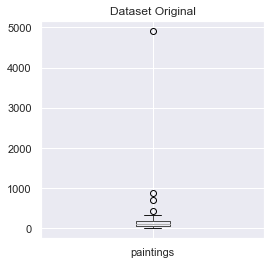

In [19]:
# Vou aplicar um box plot para exibir os outliers do dataframe original

plt.figure(figsize=(4,4)) # Definindo o tamanho e a largura da imagem
df.boxplot(lst_attr); # A imagem tem, antes a aplicação do método, alguns outliers
plt.title('Dataset Original');

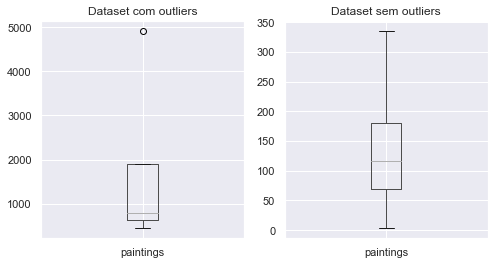

In [20]:
# Vou aplicar um box plot para facilitar na exibição do(s) outlier(s) após a aplicação do método
# identifiers_remove_outliers_iqr

plt.figure(figsize=(8,4)) # Definindo o tamanho e a largura da imagem
plt.subplot(121); dt_out_iqr.boxplot(lst_attr); # A imagem da esquerda tem, após a aplicação do método, dataset com outliers
plt.title('Dataset com outliers');
plt.subplot(122); dt_in_iqr.boxplot(lst_attr);  # A imagem da direita tem, após a aplicação do método, dataset sem outliers
plt.title('Dataset sem outliers');

In [21]:
# Vou exibir os valores do dataframe com os outliers, mas olhando só o outiler da coluna paintings
# A princípio não faz muito sentido somente a informação de paintings
dt_out_iqr[lst_attr].query('paintings >= 350')

paintings
8         877
13        439
30        702
51       4920

In [22]:
# Vou exibir os valores do dataframe com os outiliers, mas com todos os atributos para que faça sentido as informações 
# consideradas outliers
dt_out_iqr.query('paintings >= 350')

name        years               genre nationality  \
8    Vincent van Gogh  1853 – 1890  Post-Impressionism       Dutch   
13      Pablo Picasso  1881 - 1973              Cubism     Spanish   
30        Edgar Degas  1834 - 1917       Impressionism      French   
51  Candido Portinari  1903 – 1962          Neorealism   Brazilian   

                                                  bio  \
8   Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...   
13  Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...   
30  Edgar Degas (US:  or UK: ; born Hilaire-Germai...   
51  Candido Portinari (December 29, 1903 – Februar...   

                                          wikipedia  paintings  birth  
8     http://en.wikipedia.org/wiki/Vincent_van_Gogh        877   1853  
13       http://en.wikipedia.org/wiki/Pablo_Picasso        439   1881  
30         http://en.wikipedia.org/wiki/Edgar_Degas        702   1834  
51  https://en.wikipedia.org/wiki/Candido_Portinari       4920   1903

#### c) (1 ponto)

Crie um novo atributo numérico, codificando em inteiros o atributo `nationality`. Posteriormente, compute a correlação de Pearson entre esse novo atributo e o atributo `paintings`

In [23]:
# Antes de mais nada, validarei as diferentes nacionalidades que existem no meu dataframe
attr = 'nationality'

# Criando um array para armazenar os elementos únicos do atributo de nacionalidade
arr_nationality = df[attr].unique()

print(f'{arr_nationality}')

['Italian' 'Russian' 'Mexican' 'French' 'Belgian' 'Spanish' 'Dutch'
 'Austrian' 'Flemish' 'Spanish,Greek' 'German' 'French,British'
 'French,Jewish,Belarusian' 'British' 'Norwegian' 'German,Swiss'
 'American' 'Brazilian']


<span style='color:blue'>O resultado acima, num primeiro momento, é bem curioso, pois eu tinha entendido que estava errado e de fato não está.<br>Isso ocorre, um elemento ter duas nacionalidades - 'German,Swiss', devido ao fato de um determinado pintor, por exemplo Leonardo da Vinci, ter a nacionalidade Italiana e Francesa.<br>Por isso eu considerei a nacionalidade Francesa e Britânica diferente da nacionalidade somente Britânica ou, somente, Francesa.</span>

In [24]:
# Criando o novo atributo numérico para nationality
new_attr = 'nationality_oe'

# Instânciando a classe OrdinalEncoder() - parametrizando para ficar com inteiros
oe = OrdinalEncoder(categories = [arr_nationality], dtype = 'int64')

# Fazendo o transform no atributo nationality e adicionando o novo atributo númerico de nationality
df[new_attr] = oe.fit_transform(df[[attr]])

# Exibindo o dataframe modificado
df.head()

name        years                         genre nationality  \
0   Amedeo Modigliani  1884 - 1920                 Expressionism     Italian   
1  Vasiliy Kandinskiy  1866 - 1944  Expressionism,Abstractionism     Russian   
2        Diego Rivera  1886 - 1957       Social Realism,Muralism     Mexican   
3        Claude Monet  1840 - 1926                 Impressionism      French   
4       Rene Magritte  1898 - 1967      Surrealism,Impressionism     Belgian   

                                                 bio  \
0  Amedeo Clemente Modigliani (Italian pronunciat...   
1  Wassily Wassilyevich Kandinsky (Russian: Васи́...   
2  Diego María de la Concepción Juan Nepomuceno E...   
3  Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...   
4  René François Ghislain Magritte (French: [ʁəne...   

                                        wikipedia  paintings  birth  \
0  http://en.wikipedia.org/wiki/Amedeo_Modigliani        193   1884   
1  http://en.wikipedia.org/wiki/Wassily_Kandinsky         88   1866   
2       http://en.wikipedia.org/wiki/Diego_Rivera         70   1886   
3       http://en.wikipedia.org/wiki/Claude_Monet         73   1840   
4      http://en.wikipedia.org/wiki/René_Magritte        194   1898   

   nationality_oe  
0               0  
1               1  
2               2  
3               3  
4               4

In [25]:
# Olhando a quantidade de linhas e nova quantidade total de colunas no dataframe
print(f'Estado atual do dataframe:\n{space}Linhas: {df.shape[0]}\n{space}Colunas: {df.shape[1]}')

Estado atual do dataframe:
   Linhas: 53
   Colunas: 9


In [26]:
# Criando uma lista de variáveis para avaliar sua correlação
lst_corr = ['paintings', 'nationality_oe']

# Usando a correlação do pandas selecionando o parâmetro de pearson para identificar as variáveis mais correlacionadas
corr     = df[lst_corr].corr(method = 'pearson')

# Utilizando o comprenhension para maximizar a performance com os for aninhados
var = [round(np.abs(corr[i][j]), 2) for i in corr.columns for j in corr.columns if i != j]

print(f'Correlação entre os atributos {lst_corr[0]} e {lst_corr[1]}: {var[0]}')

Correlação entre os atributos paintings e nationality_oe: 0.32


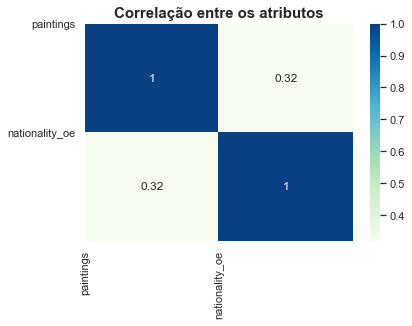

In [27]:
my_cols = corr.columns.to_list()

# Outro jeito mais simples é utilizando o heatmap
sns.heatmap(np.abs(corr.values), annot=True, cmap='GnBu')

plt.title('Correlação entre os atributos', fontsize=15, fontweight='bold')
plt.yticks(np.arange(len(my_cols)), my_cols, rotation=0);
plt.xticks(np.arange(len(my_cols)), my_cols, rotation=90);

### Questão 4 (2.5 pontos)

Dada uma imagem `painting.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares. Para isso utilizaremos uma composição de descritores:
1. Histograma de cores (R, G, B) considerando 4 bins por canal de cor (total 12 características)
2. Descritor LBP utilizando raio 2.5 e 16 pontos (total 18 características).

Concatene esses dois descritores e use-o como descritor de cor e textura da imagem. Faça uma busca no diretório `paintings`, retornando as 5 imagens mais similares de acordo com esse descritor e a distância Euclidiana. Exiba a imagem de consulta e também as 5 imagens retornadas, com seus nomes e valor da distância obtido.

In [28]:
# inclua as funções necessárias
def histograma_global(img, bins = 4):

    # Um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    
    # Mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        
        hist = np.concatenate([hist_R, hist_G, hist_B])
    
    # Normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001) # Igual a 1e-4 
    
    return hist

def lbp_features(img, points=16, radius=2.5):
    # LBP opera em imagens de um só canal, vou converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # Normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # Definição o numero de pontos e o raio, padrao = 16, 2.5
    lbp = local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # Lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), range=(0, points + 2))

    # Normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    # Retorna o histograma
    return hist

# Função em lambda da distância euclidiana
f_de = lambda x, y: np.sqrt(np.sum((x-y)**2))

In [29]:
# Inclua o código para carregar as imagens
pathname = 'paintings/*'

# leitura das imagens
all_imgs_path = glob.glob(pathname)

all_imgs = {}

for img_path in all_imgs_path:
    key = img_path.rsplit('\\')[-1]
    img = imageio.imread(img_path)
    all_imgs[key] = img

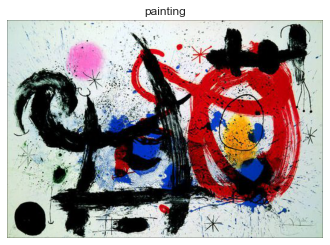

In [30]:
# Nesta célula vou armazenar a imagem de consulta, painting, na variável query_img
img_name  = 'painting.jpg'

query_img = all_imgs[img_name]

plt.imshow(query_img)
plt.title(f"{img_name.rsplit('.')[0]}")
plt.axis('off')
plt.show()

In [31]:
# Gerar os vetores de características
# Utilizo o método do histograma_global para gerar os vetores de características
v_lbp1   = [histograma_global(v) for v in all_imgs.values()]

# Executo o métdodo lbp para a geração dos vetores de características
v_lbp2   = [lbp_features(v) for v in all_imgs.values()]

# Concateno os dois vetores cada qual possui uma configuração diferente
v_lbp    = np.concatenate((v_lbp1, v_lbp2), axis=1)

# Armazenando os nomes das imagens
v_nm_img = [k for k in all_imgs.keys()]

# Transformando a lista em matriz para facilitar as buscas
arr_nm_img = np.array(v_nm_img)

In [32]:
# Obter as distâncias
# Vou adicionar o índice da imagem para facilitar na busca, uma vez que estou trabalhando com vetor
index = v_nm_img.index(img_name)

# Estou usando método da distância euclidiana que eu criei como função lambda 
# e passando a imagem de consulta com todos os vetores
img_dist = [f_de(v_lbp[index], v) for v in v_lbp]

# Vou recuparar os 6 índices com as menores distâncias, aqui estou incluindo o primeiro indíce, a minha imagem de consulta
indx = np.argsort(img_dist)[0:6]

# Transformando a lista em matriz para facilitar as buscas
arr_img_dist = np.array(img_dist)

# Adicionando os 6 elementos em um dicionário, incluindo a imagem de consulta
dc_dist_imgs = {name : distance for name, distance in zip(arr_nm_img[indx], arr_img_dist[indx])}

In [33]:
# Exibir somente os nomes e as distâncias
for name, distance in dc_dist_imgs.items():
    print(f'Imagem: {name} e a distância: {distance:.4f}')

Imagem: painting.jpg e a distância: 0.0000
Imagem: Joan_Miro_9.jpg e a distância: 0.1500
Imagem: Joan_Miro_3.jpg e a distância: 0.1591
Imagem: William_Turner_6.jpg e a distância: 0.1748
Imagem: Frida_Kahlo_7.jpg e a distância: 0.2143
Imagem: Caravaggio_5.jpg e a distância: 0.2237


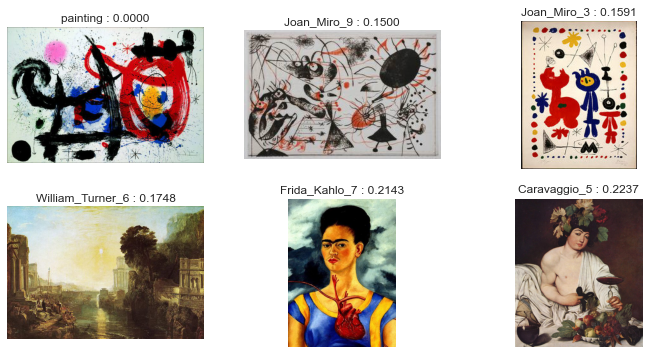

In [34]:
# Inclua o código para obter as 5 imagens mais próximas com base nas distâncias computadas e exibi-las
# Ajustando os subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for (name, distance), ax in zip(dc_dist_imgs.items(), axes.flat):
    ax.imshow(all_imgs[name])
    ax.set_title(f"{name.rsplit('.')[0]} : {distance:.4f}")
    ax.axis('off')

plt.show()

In [35]:
# Fazendo a solução de outro jeito, colocando os dois métodos num só.
# Inclua as funções necessárias
def histograma_global_lbp(img, points = 16, radius = 2.5, bins = 4):

    # Um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
    
    # Mais do que um canal de cor RGB
    if (len(img.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
    
    # LBP opera em imagens de um só canal, aqui vamos converter 
    # RGB para escala de cinza usando o método Luminance
    img = np.array(img, dtype=np.float64, copy=False)
    if (len(img.shape) > 2):
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11
    
    # Normaliza a imagem para ter máximo = 255
    if (np.max(img) > 0):
        img = ((img/np.max(img))*255).astype(np.uint8)
    
    # Definição o numero de pontos e o raio, padrao = 16, 2.5
    lbp = local_binary_pattern(img.astype(np.uint8), points, radius, method="uniform")
    
    # Lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist_lbp, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), range=(0, points + 2))
    
    hist_cor = np.concatenate([hist_R, hist_G, hist_B])
    
    # Normaliza o vetor resultante das cores pela soma dos valores
    hist_cor = hist_cor.astype("float")
    hist_cor /= (hist_cor.sum() + 1e-4) # Igual a 0.0001
    
    # Normaliza o vetor resultante do método LBP pela soma dos valores
    hist_lbp = hist_lbp.astype("float")
    hist_lbp /= (hist_lbp.sum() + 1e-6) # A diferença da normalização da quantidade de cores está pela quantidade de 0.
    
    hist = np.concatenate([hist_cor, hist_lbp])
    
    return hist

In [36]:
# Utilizo o método do histograma_global_lbp para gerar os vetores de características
v_lbp_g = [histograma_global_lbp(v) for v in all_imgs.values()]

# Vou adicionar o índice da imagem para facilitar na busca, uma vez que estou trabalhando com vetor
idx = v_nm_img.index(img_name)

# Estou usando método da distância euclidiana que eu criei como função lambda 
# e passando a imagem de consulta com todos os vetores
img_dst = [f_de(v_lbp_g[idx], v) for v in v_lbp_g]

# Vou recuparar os 6 índices com as menores distâncias, aqui estou incluindo no primeiro indíce a minha imagem de consulta
indx = np.argsort(img_dst)[0:6]

# Transformando a lista em matriz para facilitar as buscas
arr_ig_dist = np.array(img_dst)

In [37]:
# Armazenando os nomes das imagens
v_n_img = [k for k in all_imgs.keys()]

# Transformando a lista em matriz para facilitar as buscas
arr_n_img = np.array(v_n_img)

# Adicionando os 6 elementos em um dicionário, incluindo a imagem de consulta
dc_dist_igs = {name : distance for name, distance in zip(arr_n_img[indx], arr_ig_dist[indx])}

# Exibir somente os nomes e as distâncias
for name, distance in dc_dist_igs.items():
    print(f'Imagem: {name} e a distância: {distance:.4f}')

Imagem: painting.jpg e a distância: 0.0000
Imagem: Joan_Miro_9.jpg e a distância: 0.1500
Imagem: Joan_Miro_3.jpg e a distância: 0.1591
Imagem: William_Turner_6.jpg e a distância: 0.1748
Imagem: Frida_Kahlo_7.jpg e a distância: 0.2143
Imagem: Caravaggio_5.jpg e a distância: 0.2237


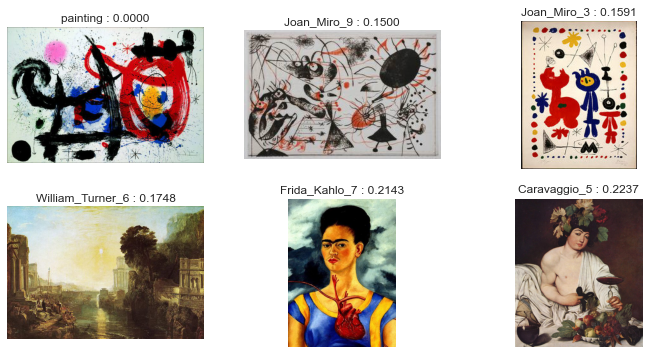

In [38]:
# Inclua o código para obter as 5 imagens mais próximas com base nas distâncias computadas e exibi-las
# Ajustando os subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for (name, distance), ax in zip(dc_dist_igs.items(), axes.flat):
    ax.imshow(all_imgs[name])
    ax.set_title(f"{name.rsplit('.')[0]} : {distance:.4f}")
    ax.axis('off')

plt.show()